#Customer Churn Analysis using Artificial Neural Network (deep learning)

Importing libraries

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import  StandardScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Load Data 

In [ ]:
# Get the dataset
df_data = pd.read_csv('/Churn_Modelling.csv')
df_data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Data Exploration


In [ ]:
#check the number of records in dataset
df_data.shape

(10000, 14)

In [ ]:
#check the column names
df_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#check data types of each column
df_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#Separate features and output label
# RowNumber, CustomerId, Surname are not important hence excluding from the feature dataset
X = df_data.iloc[:, 3:13]
Y = df_data.iloc[:,-1]
#X
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

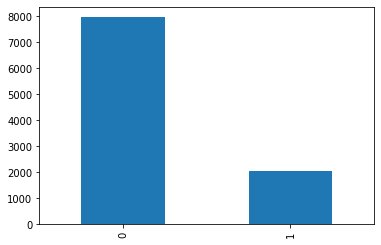

In [ ]:
df_data["Exited"].value_counts().plot(kind = "bar")


Data Preprocessing

In [ ]:
#Create dummy variables for categorial columns
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#add the newly created columns to the dataframe
X = pd.concat([X, geography, gender], axis = 1)

#remove the duplicates colums which had categorial value
X = X.drop(['Geography','Gender'], axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


Divide the data into train and test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .15, random_state = 1)

#print the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(8500, 11) (1500, 11)


Feature Scaling

In [ ]:
#scale the date to bring all the feature into same scale
sc_scale = StandardScaler()
X_train = sc_scale.fit_transform(X_train)
X_test = sc_scale.transform(X_test)

Modelling

In [ ]:
#Initialising the ANN
model = Sequential()

#adding 1st hidden layer
model.add(Dense(10, kernel_initializer = 'he_uniform',  activation = 'relu'))

#adding 2nd dense layer
model.add(Dense(10, kernel_initializer = 'he_uniform', activation = 'relu'))

#Output layer
model.add(Dense(1 , activation = 'sigmoid' ))

#compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#fit the model
model_fit = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 100)

Epoch 1/100
680/680 [==============================] - 2s 2ms/step - loss: 0.4880 - accuracy: 0.7985 - val_loss: 0.4607 - val_accuracy: 0.8006
Epoch 2/100
680/680 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.8113 - val_loss: 0.4366 - val_accuracy: 0.8106
Epoch 3/100
680/680 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8204 - val_loss: 0.4234 - val_accuracy: 0.8147
Epoch 4/100
680/680 [==============================] - 1s 2ms/step - loss: 0.4060 - accuracy: 0.8241 - val_loss: 0.4075 - val_accuracy: 0.8153
Epoch 5/100
680/680 [==============================] - 1s 2ms/step - loss: 0.3918 - accuracy: 0.8260 - val_loss: 0.3909 - val_accuracy: 0.8294
Epoch 6/100
680/680 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8376 - val_loss: 0.3785 - val_accuracy: 0.8418
Epoch 7/100
680/680 [==============================] - 1s 2ms/step - loss: 0.3681 - accuracy: 0.8484 - val_loss: 0.3706 - val_accuracy: 0.8418

In [ ]:
#print the model summary
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

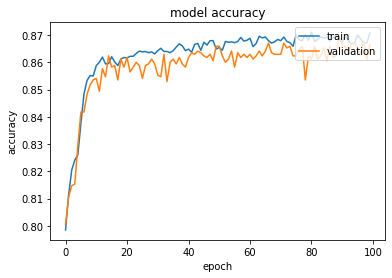

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

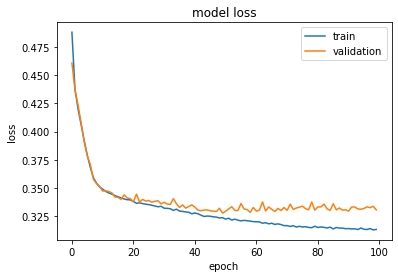

In [ ]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Prediction

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[0.01494497]
 [0.0539116 ]
 [0.03980243]
 ...
 [0.03440729]
 [0.05428869]
 [0.13332754]]


Text(0, 0.5, 'True Postive rate')

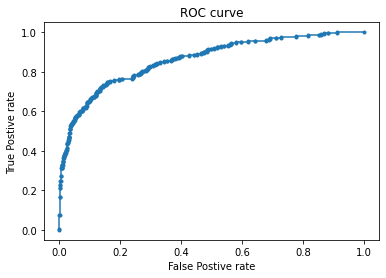

In [ ]:
#create ROC curve to decide the appropriate threshold
from sklearn.metrics import roc_curve, auc
Y_pred_ravel = Y_pred_tune1.ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(Y_test, Y_pred_ravel)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.')
plt.title("ROC curve")
plt.xlabel("False Postive rate")
plt.ylabel("True Postive rate")

In [ ]:
#apply rule to dertemine the label of predictions
Y_pred_final = np.where(Y_pred > 0.6, 1, 0)
Y_pred_final

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#create confusion matrix for the prediction to see which samples were incorrectly classified
res_matrix = confusion_matrix(Y_test, Y_pred_final)
res_matrix

array([[1149,   23],
       [ 186,  142]])

In [ ]:
# Calculate the Accuracy
score = accuracy_score(Y_test, Y_pred_final)
score 

0.8606666666666667

Hyper parameter tunning

In [ ]:
#hyperparameter tunning using keras tunner
!pip install keras-tuner
import keras_tuner as kt

In [ ]:
#function for hyper parameter tunning
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation= hp.Choice('dense_activation', values = ['relu', 'tanh'])))
        model.add(Dropout(hp.Float('dropout',min_value=0.0,max_value=0.1,default=0.005,step=0.01)))
    model.add(Dense(1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))
    model.compile(optimizer= keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model
build_model(kt.HyperParameters())

In [ ]:
#initialise Random search
tuner = kt.RandomSearch(hypermodel= build_model, objective='val_accuracy',max_trials=5, executions_per_trial= 2, overwrite=True)

In [ ]:
#generate validation set 
#X_train_min, X_val, Y_train_min, Y_val = train_test_split(X, Y, test_size = .1, random_state = 1)
#print(X_train_min.shape, X_val.shape, Y_train_min.shape, Y_val.shape)

In [ ]:
#start the search and get best model
tuner.search(X_train, Y_train, epochs= 10, validation_split =0.2)


Trial 5 Complete [00h 02m 47s]
val_accuracy: 0.7970588207244873

Best val_accuracy So Far: 0.8626470565795898
Total elapsed time: 00h 06m 24s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#summary of the random serach
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 2
units: 480
dense_activation: tanh
dropout: 0.0
learning_rate: 0.001
Score: 0.8626470565795898
Trial summary
Hyperparameters:
num_layers: 18
units: 160
dense_activation: relu
dropout: 0.1
learning_rate: 0.0001
Score: 0.8544117510318756
Trial summary
Hyperparameters:
num_layers: 16
units: 256
dense_activation: relu
dropout: 0.09
learning_rate: 0.0001
Score: 0.8544117510318756
Trial summary
Hyperparameters:
num_layers: 19
units: 256
dense_activation: tanh
dropout: 0.04
learning_rate: 0.001
Score: 0.7970588207244873
Trial summary
Hyperparameters:
num_layers: 14
units: 384
dense_activation: tanh
dropout: 0.06
learning_rate: 0.001
Score: 0.7970588207244873


In [ ]:
#get the best model configuration and build the model
best_model = tuner.get_best_models(1)[0]
best_model.build(input_shape=(None, 11, 11))
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11, 480)           5760      
                                                                 
 dropout (Dropout)           (None, 11, 480)           0         
                                                                 
 dense_1 (Dense)             (None, 11, 480)           230880    
                                                                 
 dropout_1 (Dropout)         (None, 11, 480)           0         
                                                                 
 dense_2 (Dense)             (None, 11, 1)             481       
                                                                 
Total params: 237,121
Trainable params: 237,121
Non-trainable params: 0
_________________________________________________________________


Re-train the model using the best model from the random serach

In [ ]:
#Re train the model using full dataset
best_model.fit(X_train, Y_train, epochs= 10)

Epoch 1/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3400 - accuracy: 0.8596
Epoch 2/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3373 - accuracy: 0.8604
Epoch 3/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3405 - accuracy: 0.8611
Epoch 4/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.8606
Epoch 5/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.8607
Epoch 6/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3309 - accuracy: 0.8631
Epoch 7/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8625
Epoch 8/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3299 - accuracy: 0.8628
Epoch 9/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8676
Epoch 10/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8656

In [ ]:
#predict with the tuned model
Y_pred_tune = best_model.predict(X_test)
Y_pred_tune

array([[0.02566001],
       [0.079     ],
       [0.04228202],
       ...,
       [0.08526614],
       [0.20154405],
       [0.2400755 ]], dtype=float32)

Text(0, 0.5, 'True Postive rate')

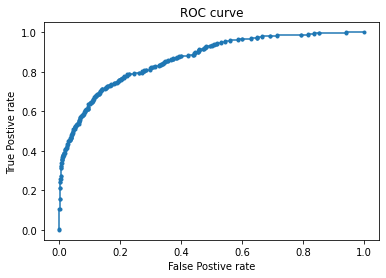

In [ ]:
#create ROC curve to decide the appropriate threshold
from sklearn.metrics import roc_curve, auc
Y_pred = Y_pred_tune.ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(Y_test, Y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.')
plt.title("ROC curve")
plt.xlabel("False Postive rate")
plt.ylabel("True Postive rate")


In [232]:
#apply rule to find predicted class
Y_pred_final_tune = np.where(Y_pred_tune > 0.6, 1, 0)
Y_pred_final_tune

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [233]:
#Confusion matrix to misclassifications
res_matrix = confusion_matrix(Y_test, Y_pred_final_tune)
res_matrix

array([[1134,   38],
       [ 158,  170]])

In [234]:
#accuracy score
score = accuracy_score(Y_test, Y_pred_final_tune)
score 

0.8693333333333333

Re-train the model using the best hyper parameter from Random serach

---



In [ ]:
#retain using the best parameter
best_param = tuner.get_best_hyperparameters(1)[0]
print(best_param.values)
best_model1 = tuner.hypermodel.build(best_param)
best_model1.build(input_shape=(None, 11, 11))
best_model1.summary()


{'num_layers': 2, 'units': 480, 'dense_activation': 'tanh', 'dropout': 0.0, 'learning_rate': 0.001}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11, 480)           5760      
                                                                 
 dropout_2 (Dropout)         (None, 11, 480)           0         
                                                                 
 dense_4 (Dense)             (None, 11, 480)           230880    
                                                                 
 dropout_3 (Dropout)         (None, 11, 480)           0         
                                                                 
 dense_5 (Dense)             (None, 11, 1)             481       
                                                                 
Total params: 237,121
Trainable params: 237,121
Non-trainable params: 0
______________

In [ ]:
best_model1.fit(X_train, Y_train, epochs= 10)

Epoch 1/10
266/266 [==============================] - 1s 4ms/step - loss: 0.4603 - accuracy: 0.7976
Epoch 2/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3714 - accuracy: 0.8439
Epoch 3/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3548 - accuracy: 0.8562
Epoch 4/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8560
Epoch 5/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3455 - accuracy: 0.8561
Epoch 6/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3421 - accuracy: 0.8585
Epoch 7/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8612
Epoch 8/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3384 - accuracy: 0.8600
Epoch 9/10
266/266 [==============================] - 1s 4ms/step - loss: 0.3399 - accuracy: 0.8609
Epoch 10/10
266/266 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8609

In [ ]:
#predict with the tuned model
Y_pred_tune1 = best_model1.predict(X_test)
Y_pred_tune1

array([[0.04344833],
       [0.08900088],
       [0.05960342],
       ...,
       [0.07726082],
       [0.35960132],
       [0.20608294]], dtype=float32)

Text(0, 0.5, 'True Postive rate')

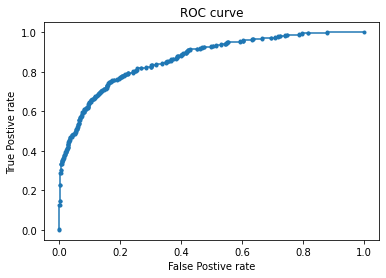

In [ ]:
#create ROC curve to decide the appropriate threshold
from sklearn.metrics import roc_curve, auc
Y_pred1 = Y_pred_tune1.ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(Y_test, Y_pred1)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.')
plt.title("ROC curve")
plt.xlabel("False Postive rate")
plt.ylabel("True Postive rate")

In [229]:
#apply rule to find predicted class
Y_pred_final_tune1 = np.where(Y_pred_tune1 > 0.6, 1, 0)
Y_pred_final_tune1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [230]:
#Confusion matrix to misclassifications
res_matrix = confusion_matrix(Y_test, Y_pred_final_tune1)
res_matrix


array([[1143,   29],
       [ 182,  146]])

In [231]:
#accuracy score
score = accuracy_score(Y_test, Y_pred_final_tune)
score 

0.8693333333333333